# Homework 2: Segmantic Segmentation with ConvNets 

In [24]:
# All necessary imports for the project:

import os
import numpy as np
import skimage
import skimage.data
import skimage.io
from pathlib import Path

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

# TensorFlow and parameters:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow as tf
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Check the GPU
print("GPU Available: ", tf.test.is_gpu_available())


GPU Available:  True


Let's see the distribution of labels in the testing set, done as in exercise 9. 


In [25]:
# Path to the test data 
p = Path('./data/test')
# Label pattern and find files with this pattern
pattern = 'test_lbl*.png'
label_files = list(p.glob(pattern))

first = True
# Bins in the histogram:
r = list(range(257))

# Iterate over all files and compute the histogram, m=maximum pixel value
for file in label_files:
    label =  skimage.io.imread(file)
    if first:
        # Compute the histogram of the label image
        global_histogram, _ = np.histogram(label, bins=r)
        n_labels = 1
        first = False
        m = np.max(label)

    else:
        # Adds the histogram of the current label image to the global histogram
        histogram, _ = np.histogram(label, bins=r)
        global_histogram += histogram
        m2 = np.max(label)
        m = max(m, m2)
        n_labels += 1
        
# Prints the average histogram and the maximum pixel value
print(global_histogram / n_labels)
print(m)

[3.16419492e+00 2.54793750e+03 0.00000000e+00 9.88562500e+02
 9.73867585e+02 2.67949153e+02 6.67847193e+03 1.61374804e+04
 2.10556303e+03 3.09758475e+02 0.00000000e+00 1.61782039e+04
 1.19424258e+03 3.29902013e+02 2.05709746e+01 0.00000000e+00
 0.00000000e+00 3.88047140e+02 3.73993644e+00 3.68326271e+00
 2.55320445e+02 1.09412632e+04 8.62003708e+02 2.01851589e+03
 1.31897775e+02 1.60423729e+01 2.54776430e+03 5.56622881e+02
 2.44385593e+00 0.00000000e+00 2.81991525e+00 0.00000000e+00
 1.08898305e+00 6.90720339e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

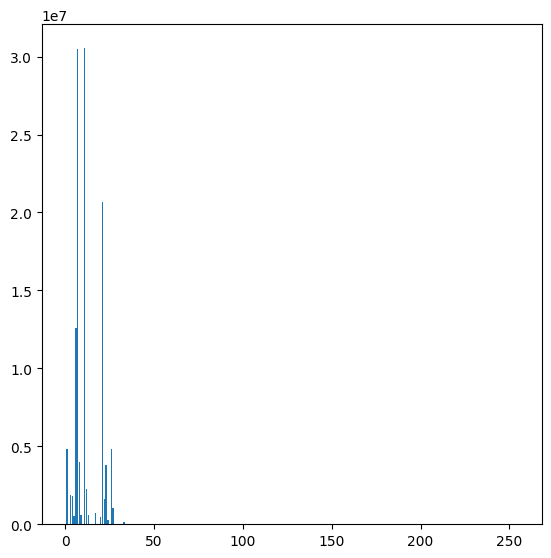

In [26]:
# Plots the global histogram
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(256),global_histogram)
plt.show()

In [4]:
print("TensorFlow Version: ", tf.__version__)

# Simple MNSIT example
# Load the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='layer_1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='layer_2')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)



TensorFlow Version:  2.13.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1040 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0735 - accuracy: 0.9773
